# Project on Digit Recognition using Neural Networks
## Abstract:
### Digit recognition system is the working of a machine to train itself or recognizing the digits from different sources like emails, bank cheque, papers, images, etc. and in different real-world scenarios for online handwriting recognition on computer tablets or system, recognize number plates of vehicles, processing bank cheque amounts, numeric entries in forms filled up by hand (say — tax forms) and so on.
## Problem Statement:
### Implement a simple image classification based on a deep neural network.

## Dataset Information:
### The Street View House Numbers (SVHN) dataset is a real-world image dataset and has been obtained from house numbers in Google Street View images.
### Fragments of this dataset were preprocessed:
#### ● Fields of photos that do not contain digits were cut off;
#### ● The photos were formatted to the standard 32X32 size;
#### ● Three color channels were converted into one channel (grayscale);
#### ● Each of the resulting images was represented as an array of numbers.

### 1. Importing Necessary Libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline
import h5py 

### 2. Importing the Dataset:

In [2]:
h5=h5py.File('SVHN_single_grey1.h5','r')

### 3. Spliting the Dataset:

In [3]:
# Checking for the keys in the dataset to split the dataset and get required subsets
h5.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [4]:
# Getting required subsets
x_test=h5.get('X_test')
x_train=h5.get('X_train')
x_val=h5.get('X_val')
y_test=h5.get('y_test')
y_train=h5.get('y_train')
y_val=h5.get('y_val')

### 4.  EDA:

In [5]:
# Checking the datatype of the subsets
x_val

<HDF5 dataset "X_val": shape (60000, 32, 32), type "<f4">

In [6]:
# Converting <f5 subsets to array subset
x_test=np.array(x_test)
x_train=np.array(x_train)
x_val=np.array(x_val)
y_test=np.array(y_test)
y_train=np.array(y_train)
y_val=np.array(y_val)

In [7]:
x_test.shape

(18000, 32, 32)

In [8]:
x_train.shape

(42000, 32, 32)

In [9]:
x_val.shape

(60000, 32, 32)

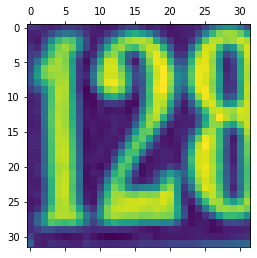

In [10]:
plt.matshow(x_train[0]) # Viewing Sample 1   

In [11]:
y_train[0] # Checking Sample 1

2

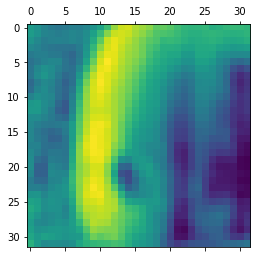

In [12]:
plt.matshow(x_train[10]) # Viewing Sample 2

In [13]:
y_train[10] # Checking Sample 2

1

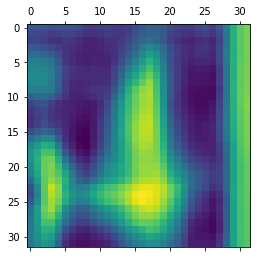

In [14]:
plt.matshow(x_train[50]) # Viewing Sample 3

In [15]:
y_train[50] # Checking Sample 3

4

### 5. Data Normalization:

In [16]:
x_train[0] # We can see that the values are between 0 to 255 so we have to normalize the dataset

array([[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,  42.9939],
       [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,  84.2949],
       [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 , 115.4228],
       ...,
       [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,  26.0603],
       [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,  30.0661],
       [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,  53.0377]],
      dtype=float32)

In [17]:
X_train=x_train/255
X_test=x_test/255
X_val=x_val/255

In [18]:
X_train[0] # We can see that the data array is between 0 to 1

array([[0.12968785, 0.11866706, 0.10530196, ..., 0.2801847 , 0.2283153 ,
        0.16860352],
       [0.09893451, 0.10020902, 0.1175549 , ..., 0.4432192 , 0.40534863,
        0.33056822],
       [0.10304902, 0.08868118, 0.15873058, ..., 0.44432473, 0.47754902,
        0.45263842],
       ...,
       [0.11196157, 0.14200786, 0.17678471, ..., 0.09465059, 0.09840274,
        0.10219726],
       [0.15072627, 0.10381687, 0.09126157, ..., 0.11023294, 0.11556196,
        0.11790627],
       [0.19724864, 0.10226392, 0.0942702 , ..., 0.19477727, 0.19942354,
        0.20799099]], dtype=float32)

### 6. Model Building and Tweaking:

In [19]:
# Importing necessary Models and layers to work on the dataset
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten

In [20]:
model=Sequential() # Model Building

In [21]:
# Model Tweaking:
model.add(Flatten(input_shape=[32,32]))
model.add(Dense(150,activation='sigmoid'))
model.add(Dense(150,activation='tanh'))
model.add(Dense(150,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [22]:
model.summary() # Checking whether the model is built according to the dataset

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 150)               153750    
                                                                 
 dense_1 (Dense)             (None, 150)               22650     
                                                                 
 dense_2 (Dense)             (None, 150)               22650     
                                                                 
 dense_3 (Dense)             (None, 10)                1510      
                                                                 
Total params: 200,560
Trainable params: 200,560
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics='accuracy') # Eliminating error warnings

In [24]:
# Model Fitting
model.fit(X_val,y_val,epochs=15)

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 2.0367 - accuracy: 0.2284
Epoch 2/15
1875/1875 [==============================] - 3s 2ms/step - loss: 1.2645 - accuracy: 0.5791
Epoch 3/15
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0361 - accuracy: 0.6679
Epoch 4/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9298 - accuracy: 0.7036
Epoch 5/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8591 - accuracy: 0.7288
Epoch 6/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8136 - accuracy: 0.7441
Epoch 7/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7699 - accuracy: 0.7559
Epoch 8/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7450 - accuracy: 0.7653
Epoch 9/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7172 - accuracy: 0.7726
Epoch 10/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.692

In [25]:
# Model Predicting
y_predict=model.predict(X_test)

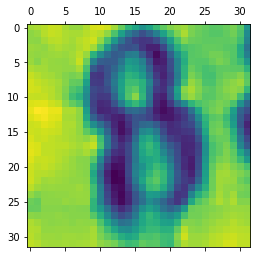

In [26]:
# Viewing a Sample data [10] after Model fit
plt.matshow(X_test[10])

In [27]:
# Checking the Sample data [10]
y_predict[10]

array([7.8039631e-02, 3.2493302e-03, 6.6766667e-04, 2.3485389e-02,
       5.7871792e-05, 5.1283915e-02, 1.3840388e-01, 3.5353045e-05,
       6.5158290e-01, 5.3194098e-02], dtype=float32)

In [28]:
# Checking the exact predicted value of sample data [10]
np.argmax(y_predict[10])

8

In [29]:
# Getting the exact predicted test values of the dataset
y_predict_exact=[np.argmax(i) for i in y_predict]
print(y_predict_exact)

[0, 7, 2, 9, 0, 9, 1, 8, 1, 4, 8, 2, 4, 4, 3, 5, 8, 6, 5, 5, 0, 6, 5, 5, 3, 2, 0, 0, 9, 5, 2, 8, 9, 1, 0, 9, 5, 4, 3, 7, 0, 4, 2, 4, 9, 6, 5, 6, 8, 3, 5, 3, 7, 1, 4, 8, 4, 4, 2, 9, 0, 1, 5, 9, 9, 2, 2, 2, 5, 8, 9, 8, 3, 8, 4, 5, 2, 8, 6, 0, 5, 4, 2, 8, 2, 4, 0, 9, 9, 5, 3, 2, 8, 5, 0, 7, 4, 4, 8, 7, 7, 7, 5, 2, 1, 4, 9, 6, 1, 4, 1, 0, 9, 0, 8, 4, 4, 1, 0, 9, 0, 3, 9, 0, 5, 0, 3, 5, 6, 1, 6, 6, 8, 9, 4, 9, 8, 8, 5, 4, 0, 2, 9, 5, 5, 0, 0, 0, 9, 9, 5, 8, 8, 9, 4, 5, 4, 4, 3, 7, 0, 0, 2, 5, 9, 2, 7, 6, 7, 1, 5, 2, 9, 0, 4, 5, 4, 5, 5, 5, 7, 2, 2, 6, 1, 6, 1, 3, 6, 9, 6, 8, 4, 9, 3, 2, 7, 8, 6, 5, 4, 5, 2, 3, 0, 2, 4, 9, 2, 8, 9, 5, 2, 0, 2, 9, 0, 2, 0, 9, 5, 1, 1, 7, 8, 9, 6, 0, 1, 3, 3, 8, 6, 3, 0, 5, 4, 7, 7, 4, 8, 7, 7, 3, 9, 0, 4, 4, 1, 3, 3, 3, 5, 4, 5, 7, 9, 0, 8, 2, 4, 6, 4, 9, 7, 7, 9, 3, 6, 2, 9, 4, 5, 0, 0, 7, 7, 0, 8, 9, 6, 3, 7, 7, 4, 6, 3, 2, 5, 2, 5, 4, 3, 0, 9, 1, 4, 5, 5, 5, 0, 2, 7, 1, 5, 1, 8, 3, 1, 4, 8, 6, 0, 3, 3, 2, 6, 1, 0, 1, 0, 6, 5, 2, 2, 1, 0, 7, 7, 0, 6, 3, 8, 

In [30]:
# Checking for model accuracy
mv=model.evaluate(X_val,y_val)
print('Validation Score:',mv)
mtr=model.evaluate(X_train,y_train)
print('Training Score:',mtr)
mte=model.evaluate(X_test,y_test)
print('Testing Score:',mte)

1875/1875 [==============================] - 3s 1ms/step - loss: 0.6244 - accuracy: 0.8031
Validation Score: [0.6243917942047119, 0.8030999898910522]
1313/1313 [==============================] - 2s 2ms/step - loss: 0.6250 - accuracy: 0.8029
Training Score: [0.6250200867652893, 0.8029047846794128]
563/563 [==============================] - 1s 2ms/step - loss: 0.6229 - accuracy: 0.8036
Testing Score: [0.6229245066642761, 0.8035555481910706]
